In [1]:
import re
import pandas as pd
import json

In [2]:

 
# Opening JSON file
f = open('MUCS_train_test_dataset_dict_v2.json',)
 
# returns JSON object as 
# a dictionary
data = json.load(f)

{'train': {'audio_id': ['100051_GigsEKRBMhvNwolC_0000.wav',
   '100051_GigsEKRBMhvNwolC_0001.wav',
   '100051_GigsEKRBMhvNwolC_0002.wav',
   '100051_GigsEKRBMhvNwolC_0003.wav',
   '100051_GigsEKRBMhvNwolC_0004.wav',
   '100051_GigsEKRBMhvNwolC_0005.wav',
   '100051_GigsEKRBMhvNwolC_0006.wav',
   '100051_GigsEKRBMhvNwolC_0007.wav',
   '100051_GigsEKRBMhvNwolC_0008.wav',
   '100051_GigsEKRBMhvNwolC_0009.wav',
   '100051_GigsEKRBMhvNwolC_0010.wav',
   '100051_GigsEKRBMhvNwolC_0011.wav',
   '100051_GigsEKRBMhvNwolC_0012.wav',
   '100051_GigsEKRBMhvNwolC_0013.wav',
   '100051_GigsEKRBMhvNwolC_0014.wav',
   '100051_GigsEKRBMhvNwolC_0015.wav',
   '100051_GigsEKRBMhvNwolC_0016.wav',
   '100051_GigsEKRBMhvNwolC_0017.wav',
   '100051_GigsEKRBMhvNwolC_0018.wav',
   '100051_GigsEKRBMhvNwolC_0019.wav',
   '100051_GigsEKRBMhvNwolC_0020.wav',
   '100051_GigsEKRBMhvNwolC_0021.wav',
   '100051_GigsEKRBMhvNwolC_0022.wav',
   '100051_GigsEKRBMhvNwolC_0023.wav',
   '100051_GigsEKRBMhvNwolC_0024.wav',
   '

In [ ]:
#load the predictions text here and decode it.

In [3]:
english_alphabets = "abcdefghijklmnopqrstuvwxyz"
english_list = re.findall(r'\w',english_alphabets)#english_alphabets.strip()
#question, should english numbers also be included? For now, I will do it.
english_list.extend(['0','1','2','3','4','5','6','7','8','9'])
english_list.extend([".","?","!","\\",":",";","-","_"," "])
print(english_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.', '?', '!', '\\', ':', ';', '-', '_', ' ']


In [3]:
english_alphabets = "abcdefghijklmnopqrstuvwxyz"
english_list2 = re.findall(r'\w',english_alphabets)#english_alphabets.strip()
#question, should english numbers also be included? For now, I will do it.
english_list2.extend(['0','1','2','3','4','5','6','7','8','9'])
english_list2.extend(["\\","_"," "])
print(english_list2)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '\\', '_', ' ']


In [7]:
tst = "लिबर ऑफिस impress में एक प्रस्तुति document बनाना और बुनियादी formatting के इस spoken tutorial में आपका स्वागत है hey! 28 . o"
x = re.findall(r'[\w\.\?\!\\:;\-_]+', tst)
print(x)

['ल', 'बर', 'ऑफ', 'स', 'impress', 'म', 'एक', 'प', 'रस', 'त', 'त', 'document', 'बन', 'न', 'और', 'ब', 'न', 'य', 'द', 'formatting', 'क', 'इस', 'spoken', 'tutorial', 'म', 'आपक', 'स', 'व', 'गत', 'ह', 'hey!', '28', '.', 'o']


In [7]:
data["test"].keys()

dict_keys(['audio_id', 'audio_paths', 'transcriptions'])

In [13]:
set(english_list)- set(x)

{'b', 'h', 'j', 'q', 'v', 'w', 'x', 'y', 'z'}

In [4]:
hindi_characters = [
    # Vowels (स्वर)
    'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'अं', 'अः',
    
    # Consonants (व्यंजन)
    'क', 'ख', 'ग', 'घ', 'ङ',
    'च', 'छ', 'ज', 'झ', 'ञ',
    'ट', 'ठ', 'ड', 'ढ', 'ण',
    'त', 'थ', 'द', 'ध', 'न',
    'प', 'फ', 'ब', 'भ', 'म',
    'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह',
    
    # Vowel Signs (मात्राएं)
    'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॅ', 'े', 'ै', 'ॉ', 'ो', 'ौ', 'ं', 'ः', 'ँ',
    
    # Numerals (संख्या)
    '०', '१', '२', '३', '४', '५', '६', '७', '८', '९',
    
    # Additional Characters
    '़'  # Nukta
]

In [44]:
escaped_characters = ''.join(re.escape(char) for char in english_list)
print(escaped_characters)
# Create the regex pattern
pattern = f"[^{escaped_characters}|\s]+"
text = "a?c !_b. abc लिबर ऑफिस लिबर ऑफिस impress में एक प्रस्तुति document बनाना और बुनियादी formatting, के इस spoken tutorial में आपका स्वागत है hey! 28 . o"
matches = re.findall(pattern, text)
print(matches)
match2 = re.findall(r'[a-zA-Z0-9,\.\?\!\\:;\-_]+',text)
print(match2)
text = text.strip(" ")
string_split= text.split()
print(string_split)
#r'[\w\.\?\!\\:;\-_]+

abcdefghijklmnopqrstuvwxyz0123456789\.\?!\\:;\-_\ 
['लिबर', 'ऑफिस', 'लिबर', 'ऑफिस', 'में', 'एक', 'प्रस्तुति', 'बनाना', 'और', 'बुनियादी', ',', 'के', 'इस', 'में', 'आपका', 'स्वागत', 'है']
['a?c', '!_b.', 'abc', 'impress', 'document', 'formatting,', 'spoken', 'tutorial', 'hey!', '28', '.', 'o']
['a?c', '!_b.', 'abc', 'लिबर', 'ऑफिस', 'लिबर', 'ऑफिस', 'impress', 'में', 'एक', 'प्रस्तुति', 'document', 'बनाना', 'और', 'बुनियादी', 'formatting,', 'के', 'इस', 'spoken', 'tutorial', 'में', 'आपका', 'स्वागत', 'है', 'hey!', '28', '.', 'o']


In [61]:
sub_txt="लिबर ऑफिस लिबर ऑफिस om nom "
x = re.findall(r'[a-zA-Z0-9,\.\?\!\\:;\-_]+', sub_txt)
split= sub_txt.split()
print(x)
print(split)

['om', 'nom']
['लिबर', 'ऑफिस', 'लिबर', 'ऑफिस', 'om', 'nom']


In [64]:
xx = ["एक", "प्रस्तुति"]
split.append(xx[0])
#split.append(xx[1])
print(split)


['लिबर', 'ऑफिस', 'लिबर', 'ऑफिस', 'om', 'nom', 'एक']


In [5]:
def create_sub_dataset(audio_ids, audio_paths, trans):
    dataset={}
    dataset["audio_id"] = audio_ids
    dataset["audio_paths"] = audio_paths
    dataset["transcriptions"] = trans
    return dataset

In [14]:
path_to_save = "/m/triton/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data"

In [ ]:
dataset_dict = {"train": create_sub_dataset(train_wav_ids, train_wav, train_trans), "test": create_sub_dataset(test_wav_ids, test_wav, test_trans)}

In [6]:
def seggregate(data_df,section):
    test_seg={"hindi":{"audio_id":[], "audio_paths":[], "transcriptions":[]},"not_hindi":{"audio_id":[], "audio_paths":[], "transcriptions":[]}}
    for i,j,k in zip(data[section]["transcriptions"], data[section]["audio_id"], data[section]["audio_paths"]):
        x = re.findall(r'\w', i)
        #print(j)
        if len(set(english_list2)-set(x))==len(english_list2):
            test_seg["hindi"]["audio_id"].extend([j])
            test_seg["hindi"]["audio_paths"].extend([k])
            test_seg["hindi"]["transcriptions"].extend([i])
            print(i)
        else:
            test_seg["not_hindi"]["audio_id"].extend([j])
            test_seg["not_hindi"]["audio_paths"].extend([k])
            test_seg["not_hindi"]["transcriptions"].extend([i])
    return test_seg

In [69]:
sub_txt="लिबर ऑफिस लिबर ऑफिस om nom "
string_split= sub_txt.split()
for i in enumerate(string_split,0):
    print(i)

(0, 'लिबर')
(1, 'ऑफिस')
(2, 'लिबर')
(3, 'ऑफिस')
(4, 'om')
(5, 'nom')


In [30]:
some_str="test test∅"
x=re.sub("\s*[∅∇]\s*"," ", some_str)
print(x)

test test 


In [15]:
def add_tags(data_df,section): #remove the punctuations in another version
    open_tag = "∅"#"<cs>"
    close_tag = "∇"#"</cs>"
    test_seg={"hindi":{"audio_id":[], "audio_paths":[], "transcriptions":[]},"not_hindi":{"audio_id":[], "audio_paths":[], "transcriptions":[]}}
    #s=" "
    #test_seg={"hindi":{"audio_id":[], "audio_paths":[], "transcriptions":[]},"not_hindi":{"audio_id":[], "audio_paths":[], "transcriptions":[]}}
    for t,(i,j,k) in enumerate(zip(data[section]["transcriptions"], data[section]["audio_id"], data[section]["audio_paths"]),0):
        x = re.findall(r'[a-zA-Z0-9,\.!\?\\:;\-_@{}×#\*ωφλ›<>$=]+', i)
        #i = i.strip(" ")
        if len(x)>0:
            mod_txt=""
            mod_txtl=[]
            #i = 
            i=i.strip()
            string_split= i.split()
            for a in string_split:
                if a in x:
                    mod_txtl.append(open_tag)
                    mod_txtl.append(a)
                    mod_txtl.append(close_tag)
                else:
                    mod_txtl.append(a)
            #print(mod_txtl)
            #print("####")
            mod_txt = " ".join(mod_txtl)
        #mod_txt = re.sub(re.escape("</cs> <cs>"),"",mod_txt)
        #mod_txt = mod_txt.replace("</cs> <cs>","")
            #mod_txt = re.sub("</cs> <cs>","",mod_txt)
            mod_txt = re.sub("∇ ∅","", mod_txt)
            print(mod_txt)
            data[section]["transcriptions"][t]=mod_txt
            print(data[section]["transcriptions"][t])
    return data
            #print("####")

In [17]:
data_mod = add_tags(data_mod,"test")

लिबर ऑफिस ∅ impress ∇ में एक प्रस्तुति ∅ document ∇ बनाना और बुनियादी ∅ formatting ∇ के इस ∅ spoken  tutorial ∇ में आपका स्वागत है
लिबर ऑफिस ∅ impress ∇ में एक प्रस्तुति ∅ document ∇ बनाना और बुनियादी ∅ formatting ∇ के इस ∅ spoken  tutorial ∇ में आपका स्वागत है
इस ∅ tutorial ∇ में हम ∅ impress  window ∇ के भागों के बारे में सीखेंगे और कैसे स्लाइड इन्सर्ट करें और कॉपी करें फॉन्ट तथा फॉन्ट को फॉर्मेट करना सीखेंगे
इस ∅ tutorial ∇ में हम ∅ impress  window ∇ के भागों के बारे में सीखेंगे और कैसे स्लाइड इन्सर्ट करें और कॉपी करें फॉन्ट तथा फॉन्ट को फॉर्मेट करना सीखेंगे
यहाँ हम अपने ऑपरेटिंग सिस्टम के रूप में gnu/linux और लिबरऑफिस वर्जन ∅ 334 ∇ का उपयोग कर रहे हैं
यहाँ हम अपने ऑपरेटिंग सिस्टम के रूप में gnu/linux और लिबरऑफिस वर्जन ∅ 334 ∇ का उपयोग कर रहे हैं
चलिए अपनी प्रस्तुति प्रेजैटेशन ∅ sample  impress  open ∇ करते हैं जिसे पिछले ∅ tutorial ∇ में बनाया था
चलिए अपनी प्रस्तुति प्रेजैटेशन ∅ sample  impress  open ∇ करते हैं जिसे पिछले ∅ tutorial ∇ में बनाया था
चलिए देखते हैं कि ∅ screen ∇ पर क्

In [135]:
data_mod = add_tags(data, "train")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [18]:
data_mod["train"]

{'audio_id': ['100051_GigsEKRBMhvNwolC_0000.wav',
  '100051_GigsEKRBMhvNwolC_0001.wav',
  '100051_GigsEKRBMhvNwolC_0002.wav',
  '100051_GigsEKRBMhvNwolC_0003.wav',
  '100051_GigsEKRBMhvNwolC_0004.wav',
  '100051_GigsEKRBMhvNwolC_0005.wav',
  '100051_GigsEKRBMhvNwolC_0006.wav',
  '100051_GigsEKRBMhvNwolC_0007.wav',
  '100051_GigsEKRBMhvNwolC_0008.wav',
  '100051_GigsEKRBMhvNwolC_0009.wav',
  '100051_GigsEKRBMhvNwolC_0010.wav',
  '100051_GigsEKRBMhvNwolC_0011.wav',
  '100051_GigsEKRBMhvNwolC_0012.wav',
  '100051_GigsEKRBMhvNwolC_0013.wav',
  '100051_GigsEKRBMhvNwolC_0014.wav',
  '100051_GigsEKRBMhvNwolC_0015.wav',
  '100051_GigsEKRBMhvNwolC_0016.wav',
  '100051_GigsEKRBMhvNwolC_0017.wav',
  '100051_GigsEKRBMhvNwolC_0018.wav',
  '100051_GigsEKRBMhvNwolC_0019.wav',
  '100051_GigsEKRBMhvNwolC_0020.wav',
  '100051_GigsEKRBMhvNwolC_0021.wav',
  '100051_GigsEKRBMhvNwolC_0022.wav',
  '100051_GigsEKRBMhvNwolC_0023.wav',
  '100051_GigsEKRBMhvNwolC_0024.wav',
  '100051_GigsEKRBMhvNwolC_0025.wav',


In [19]:
data_mod["test"]

{'audio_id': ['103085_w5Jyq3XMbb3WwiKQ_0000.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0001.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0002.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0003.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0004.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0005.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0006.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0007.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0008.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0009.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0010.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0011.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0012.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0013.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0014.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0015.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0016.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0017.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0018.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0019.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0020.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0021.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0022.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0023.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0024.wav',
  '103085_w5Jyq3XMbb3WwiKQ_0025.wav',


In [132]:
data["train"]

{'audio_id': ['100051_GigsEKRBMhvNwolC_0000.wav',
  '100051_GigsEKRBMhvNwolC_0001.wav',
  '100051_GigsEKRBMhvNwolC_0002.wav',
  '100051_GigsEKRBMhvNwolC_0003.wav',
  '100051_GigsEKRBMhvNwolC_0004.wav',
  '100051_GigsEKRBMhvNwolC_0005.wav',
  '100051_GigsEKRBMhvNwolC_0006.wav',
  '100051_GigsEKRBMhvNwolC_0007.wav',
  '100051_GigsEKRBMhvNwolC_0008.wav',
  '100051_GigsEKRBMhvNwolC_0009.wav',
  '100051_GigsEKRBMhvNwolC_0010.wav',
  '100051_GigsEKRBMhvNwolC_0011.wav',
  '100051_GigsEKRBMhvNwolC_0012.wav',
  '100051_GigsEKRBMhvNwolC_0013.wav',
  '100051_GigsEKRBMhvNwolC_0014.wav',
  '100051_GigsEKRBMhvNwolC_0015.wav',
  '100051_GigsEKRBMhvNwolC_0016.wav',
  '100051_GigsEKRBMhvNwolC_0017.wav',
  '100051_GigsEKRBMhvNwolC_0018.wav',
  '100051_GigsEKRBMhvNwolC_0019.wav',
  '100051_GigsEKRBMhvNwolC_0020.wav',
  '100051_GigsEKRBMhvNwolC_0021.wav',
  '100051_GigsEKRBMhvNwolC_0022.wav',
  '100051_GigsEKRBMhvNwolC_0023.wav',
  '100051_GigsEKRBMhvNwolC_0024.wav',
  '100051_GigsEKRBMhvNwolC_0025.wav',


In [42]:
len(test_segmented["hindi"]["transcriptions"])

572

In [7]:
train_segmented =  seggregate(data,"train")

हम यह कुछ उदाहरण उपयोग करके करेंगे
एक उदाहरण देखते हैं
मैं इसे खोलूंगी
अब एक उदाहरण देखते हैं
मेरे पास एक कार्यकारी उदाहरण है
अब सारांशित करते हैं
आई आई टी बॉम्बे से मैं श्रुति आर्य अब आपसे विदा लेती हूँ हमसे जुड़ने धन्यवाद
अब सारांशित करते हैं कि हमने क्या सीखा
यहाँ एक नियत कार्य है
आई आई टी बॉम्बे से मैं श्रुति आर्य आपसे विदा लेती हूँ हमसे जुड़ने के लिए धन्यवाद
यह थोड़ा धुंधला हो सकता है
फिर से रन करें
संक्षेप में
यह स्क्रिप्ट देवेन्द्र कैरवान द्वारा अनुवादित है आई आई टी बॉम्बे की ओर से मैं श्रुति आर्य आपसे विदा लेती हूँ धन्यवाद
पेज के बायीं तरफ जानकारी अनेक शीर्षकों में विभाजित की जाती है
नियत कार्य में
वेरिएबल घोषित करना
वेरिएबल के प्रकार बदलना
वेरिएबल का स्कोप क्या है
वेरिएबल के प्रकार
इस ट्यूटोरियल के अनुकरण के लिए आपको लिनक्स में टर्मिनल का ज्ञान होना आवश्यक है
यदि नहीं तो सम्बंधित ट्यूटोरियल के लिए दिखाई गयी हमारी वेबसाइट पर जाएँ
अब मैं समझाउंगी कि वेरिएबल क्या है
वेरिएबल का उपयोग एक वैल्यू संचित करने के लिए होता है
वेरिएबल का नाम अर्थपूर्ण होना चाहिए
अब देखते हैं सक्रीय टाइपिं

In [8]:
print(len(train_segmented["hindi"]["transcriptions"]),len(train_segmented["not_hindi"]["transcriptions"]))


6846 45979


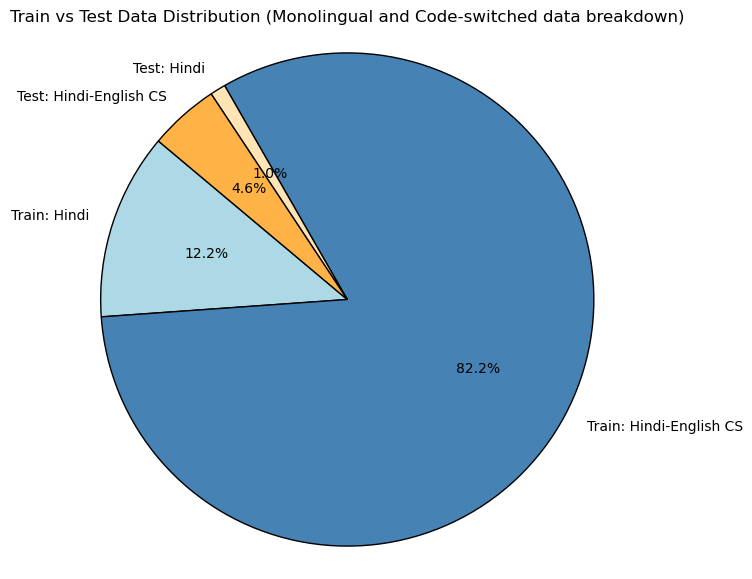

In [15]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Train: Hindi', 'Train: Hindi-English CS', 'Test: Hindi', 'Test: Hindi-English CS']
sizes = [6846, 45979, 572, 2564]

# Colors: Train has shades of blue, Test has shades of green
colors = ['#ADD8E6', '#4682B4', '#FFE4B5', '#FFB347']  # Light blue for Train-Hindi, Dark blue for Train-Hindi-English CS
                                                       # Light green for Test-Hindi, Dark green for Test-Hindi-English CS

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title("Train vs Test Data Distribution (Monolingual and Code-switched data breakdown)")

# Display the pie chart
plt.show()


In [11]:
print(len(test_segmented["hindi"]["audio_id"]), len(test_segmented["not_hindi"]["audio_id"]))

572 2564


In [14]:
test_segmented["hindi"].keys()

dict_keys(['audio_id', 'audio_paths', 'transcriptions'])

In [14]:
print(len(train_segmented["hindi"]["audio_id"]), len(train_segmented["not_hindi"]["audio_id"]))


6846 45979


In [30]:
count=0
for i in data["test"]["transcriptions"]:
    x = re.findall(r'\w', i)
    if len(set(english_list)-set(x))==len(english_list):
        count+=1
print(count)

572


In [20]:
out_file = open(f"{path_to_save}/MUCS_cs_tags_v2_train_test.json", "w") #f"{model_args.model_name_or_path}/pytorch_model.bin"

json.dump(data_mod, out_file, indent = 6)

out_file.close()